# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [6]:
# read the iris data into a pandas DataFrame, including column names
df = pd.read_csv('iris.csv')

## Task 2

In [7]:
# gather basic information
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.shape

(150, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
143,6.8,3.2,5.9,2.3,virginica
139,6.9,3.1,5.4,2.1,virginica
85,6.0,3.4,4.5,1.6,versicolor
83,6.0,2.7,5.1,1.6,versicolor
20,5.4,3.4,1.7,0.2,setosa
71,6.1,2.8,4.0,1.3,versicolor
4,5.0,3.6,1.4,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
56,6.3,3.3,4.7,1.6,versicolor
67,5.8,2.7,4.1,1.0,versicolor


## Task 3

In [2]:
import seaborn as sns

In [14]:
 # use groupby to look for differences between the species
df.groupby(['sepal_length',	'sepal_width' ,	'petal_length' , 'petal_width' , 'species'], as_index=False).sum()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.3,3.0,1.1,0.1,setosa
1,4.4,2.9,1.4,0.2,setosa
2,4.4,3.0,1.3,0.2,setosa
3,4.4,3.2,1.3,0.2,setosa
4,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
142,7.7,2.6,6.9,2.3,virginica
143,7.7,2.8,6.7,2.0,virginica
144,7.7,3.0,6.1,2.3,virginica
145,7.7,3.8,6.7,2.2,virginica


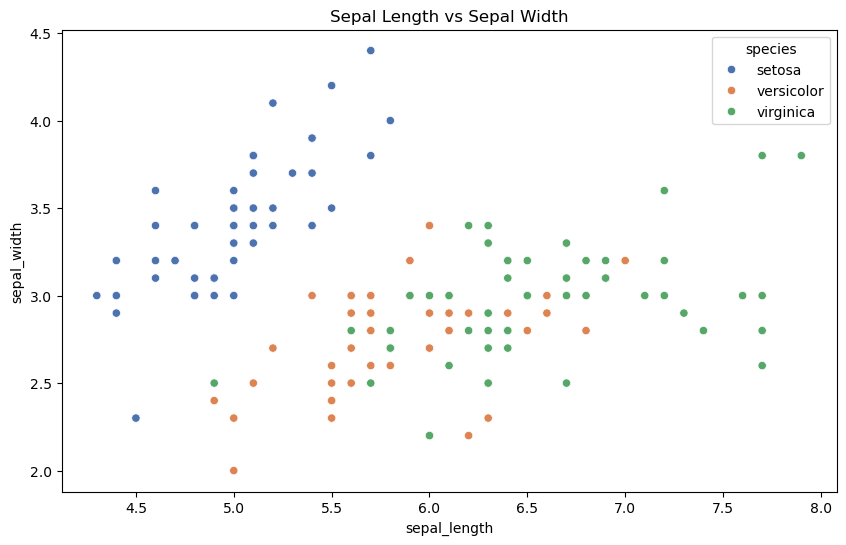

In [16]:
# use sorting to look for differences between the species
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, palette='deep')
plt.title('Sepal Length vs Sepal Width')
plt.show()

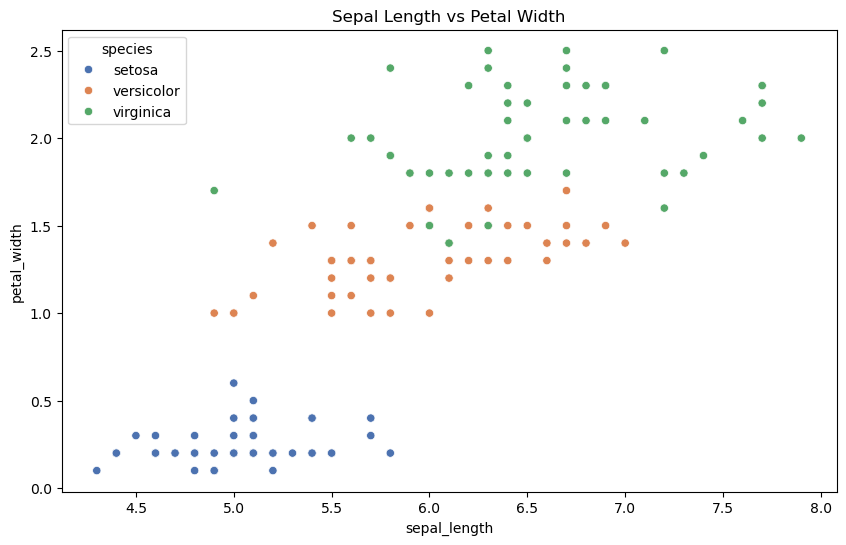

In [17]:
# use plotting to look for differences between the species
plt.figure(figsize=(10,6))
sns.scatterplot(x='sepal_length', y='petal_width', hue='species', data=df, palette='deep' )
plt.title('Sepal Length vs Petal Width')
plt.show()

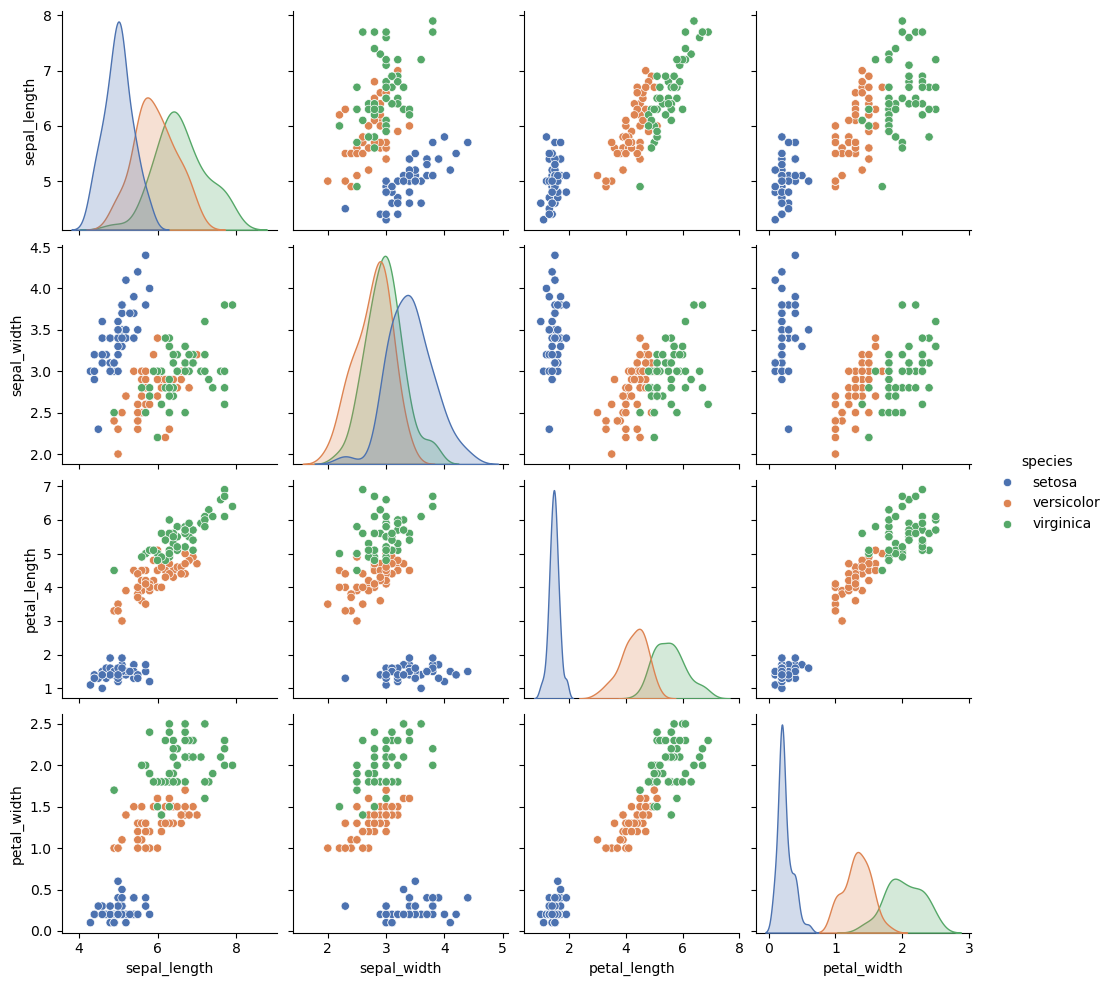

In [15]:
# map species to a numeric value so that plots can be colored by category
sns.pairplot(df, hue='species', palette='deep')
plt.show()

## Task 4

Setosa: Petal length < 2.0
Versicolor: Petal length between 2.0 and 5.0, and petal width < 1.8
Virginica: Petal length > 5.0

## Bonus

In [18]:
# define function that accepts a row of data and returns a predicted species
def predict_species(row):
    if row['petal_length'] <= 1.9:
        return'setosa'
    elif row['petal_length'] >=5 or row ['petal_width'] >= 1.7:
        return 'virginica'
    elif row['petal_length'] < 5 or row['petal_width'] < 1.7:
        return'versicolor'

In [19]:
df['predicted_species'] = df.apply(predict_species, axis=1)